# Titanic challenge, koło data science, wizualizacja danych

https://www.kaggle.com/competitions/titanic

## Słownik danych

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

Notatki do zmiennych:

**pclass**: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Odczyt danych

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
display(df1)
display(df2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df = pd.concat([df1, df2])
df = df.reset_index(drop=True)

## Bazowa wizualizacja

In [4]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [6]:
display(df.isna().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

## Imputacja brakujących danych
Ze względu na ogromne braki w kolumnie Cabin nie będziemy uzupełniać tych danych w szczególności ze względu na fakt, że są to dane tekstowe i takowa imputacja byłaby trudna

In [8]:
pc1med = df.query('Pclass == 1')['Age'].median()
pc2med = df.query('Pclass == 2')['Age'].median()
pc3med = df.query('Pclass == 3')['Age'].median()

def fill_age(row):
    age = row['Age']
    pclass = row['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return pc1med
        elif pclass == 2:
            return pc2med
        else:
            return pc3med
    else:
        return age

df['Age'] = df.apply(fill_age, axis=1)
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
df['Cabin'] = df['Cabin'].fillna('X')

In [9]:
display(df.isna().sum())

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [10]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,X,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,X,S


## Zmiana danych tekstowych na liczbowe / dane tekstowe które są zgrupowane

Co możemy zauważyć w kolumnie z imieniem to to, że znajduje się tamt tytuł Mr. Mrs. Miss. Rev. wydobądźmy go z tej kolumny w takim razie

In [11]:
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

W kolumnie z imieniem możemy zauważyć, że znajduje się tam tytuł Mr. Mrs. Miss. Rev. wydobądźmy go z tej kolumny w takim razie, można zatem za pomocą mapowania słownikiem je jakoś pogrupować

In [12]:
titles_dict = {
    "Mr" :        "Mr",
    "Miss" :      "Miss",
    "Mrs" :       "Mrs",
    "Master" :    "Master",
    "Dr":         "Clerisy",
    "Rev":        "Clerisy",
    "Mlle":       "Miss",
    "Major":      "Army",
    "Col":        "Army",
    "the Countess":"Nobility",
    "Ms":         "Mrs",
    "Sir" :       "Nobility",
    "Lady" :      "Nobility",
    "Mme":        "Mrs",
    "Don":        "Nobility",
    "Jonkheer":   "Nobility"
}
df['Title'] = df['Title'].map(titles_dict)

df['Title'].value_counts()

Title
Mr          757
Miss        262
Mrs         200
Master       61
Clerisy      16
Army          6
Nobility      5
Name: count, dtype: int64

Zobaczmy teraz czy możemy coś zrobić z wartościami z kolumny Cabin

In [13]:
df['Cabin'].unique()

array(['X', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Dzięki funkcji unique możemy zauważyć, że wartości jest bardzo wiele jednak początkowe litery kabin się powtarzają i możemy je wydobyć podobnie jak zrobiliśmy to z tytułem

In [14]:
df['Cabin'] = df['Cabin'].astype(str)

df['Cabin'] = df['Cabin'].str.replace(r'\d+', '', regex=True)
df['Cabin'] = df['Cabin'].apply(lambda x: x.split(' ')[0].strip())

df['Cabin'].value_counts()

Cabin
X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

Zmapujmy równieć płeć na dane liczbowe

In [15]:
mapping_dict = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(mapping_dict)

In [16]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,X,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,X,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,X,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,C,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,X,S,Mr


## Dalsza wizualizacja

In [17]:
for col in df.columns:
    # Wykluczamy te 3 wartości ze względu na to, że kolumna PassengerId w przewidywaniu jest nieużywana, gdyż jest ona jedynie identyfikatorem 
    # Natomiast pozostałe 2 mają duży rozstrzał wartości, wyniku czego informacje wyświetlone w ten sposób są nie do zinterpretowania
    if col in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Age']:
        continue
    display(df[col].value_counts())
    print ('------------------------------------------------------')

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

------------------------------------------------------


Sex
0    843
1    466
Name: count, dtype: int64

------------------------------------------------------


SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

------------------------------------------------------


Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

------------------------------------------------------


Cabin
X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

------------------------------------------------------


Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

------------------------------------------------------


Title
Mr          757
Miss        262
Mrs         200
Master       61
Clerisy      16
Army          6
Nobility      5
Name: count, dtype: int64

------------------------------------------------------


## Sprawdźmy jak każda z kolumn wpływa na przeżywalność pasażerów na wykresach

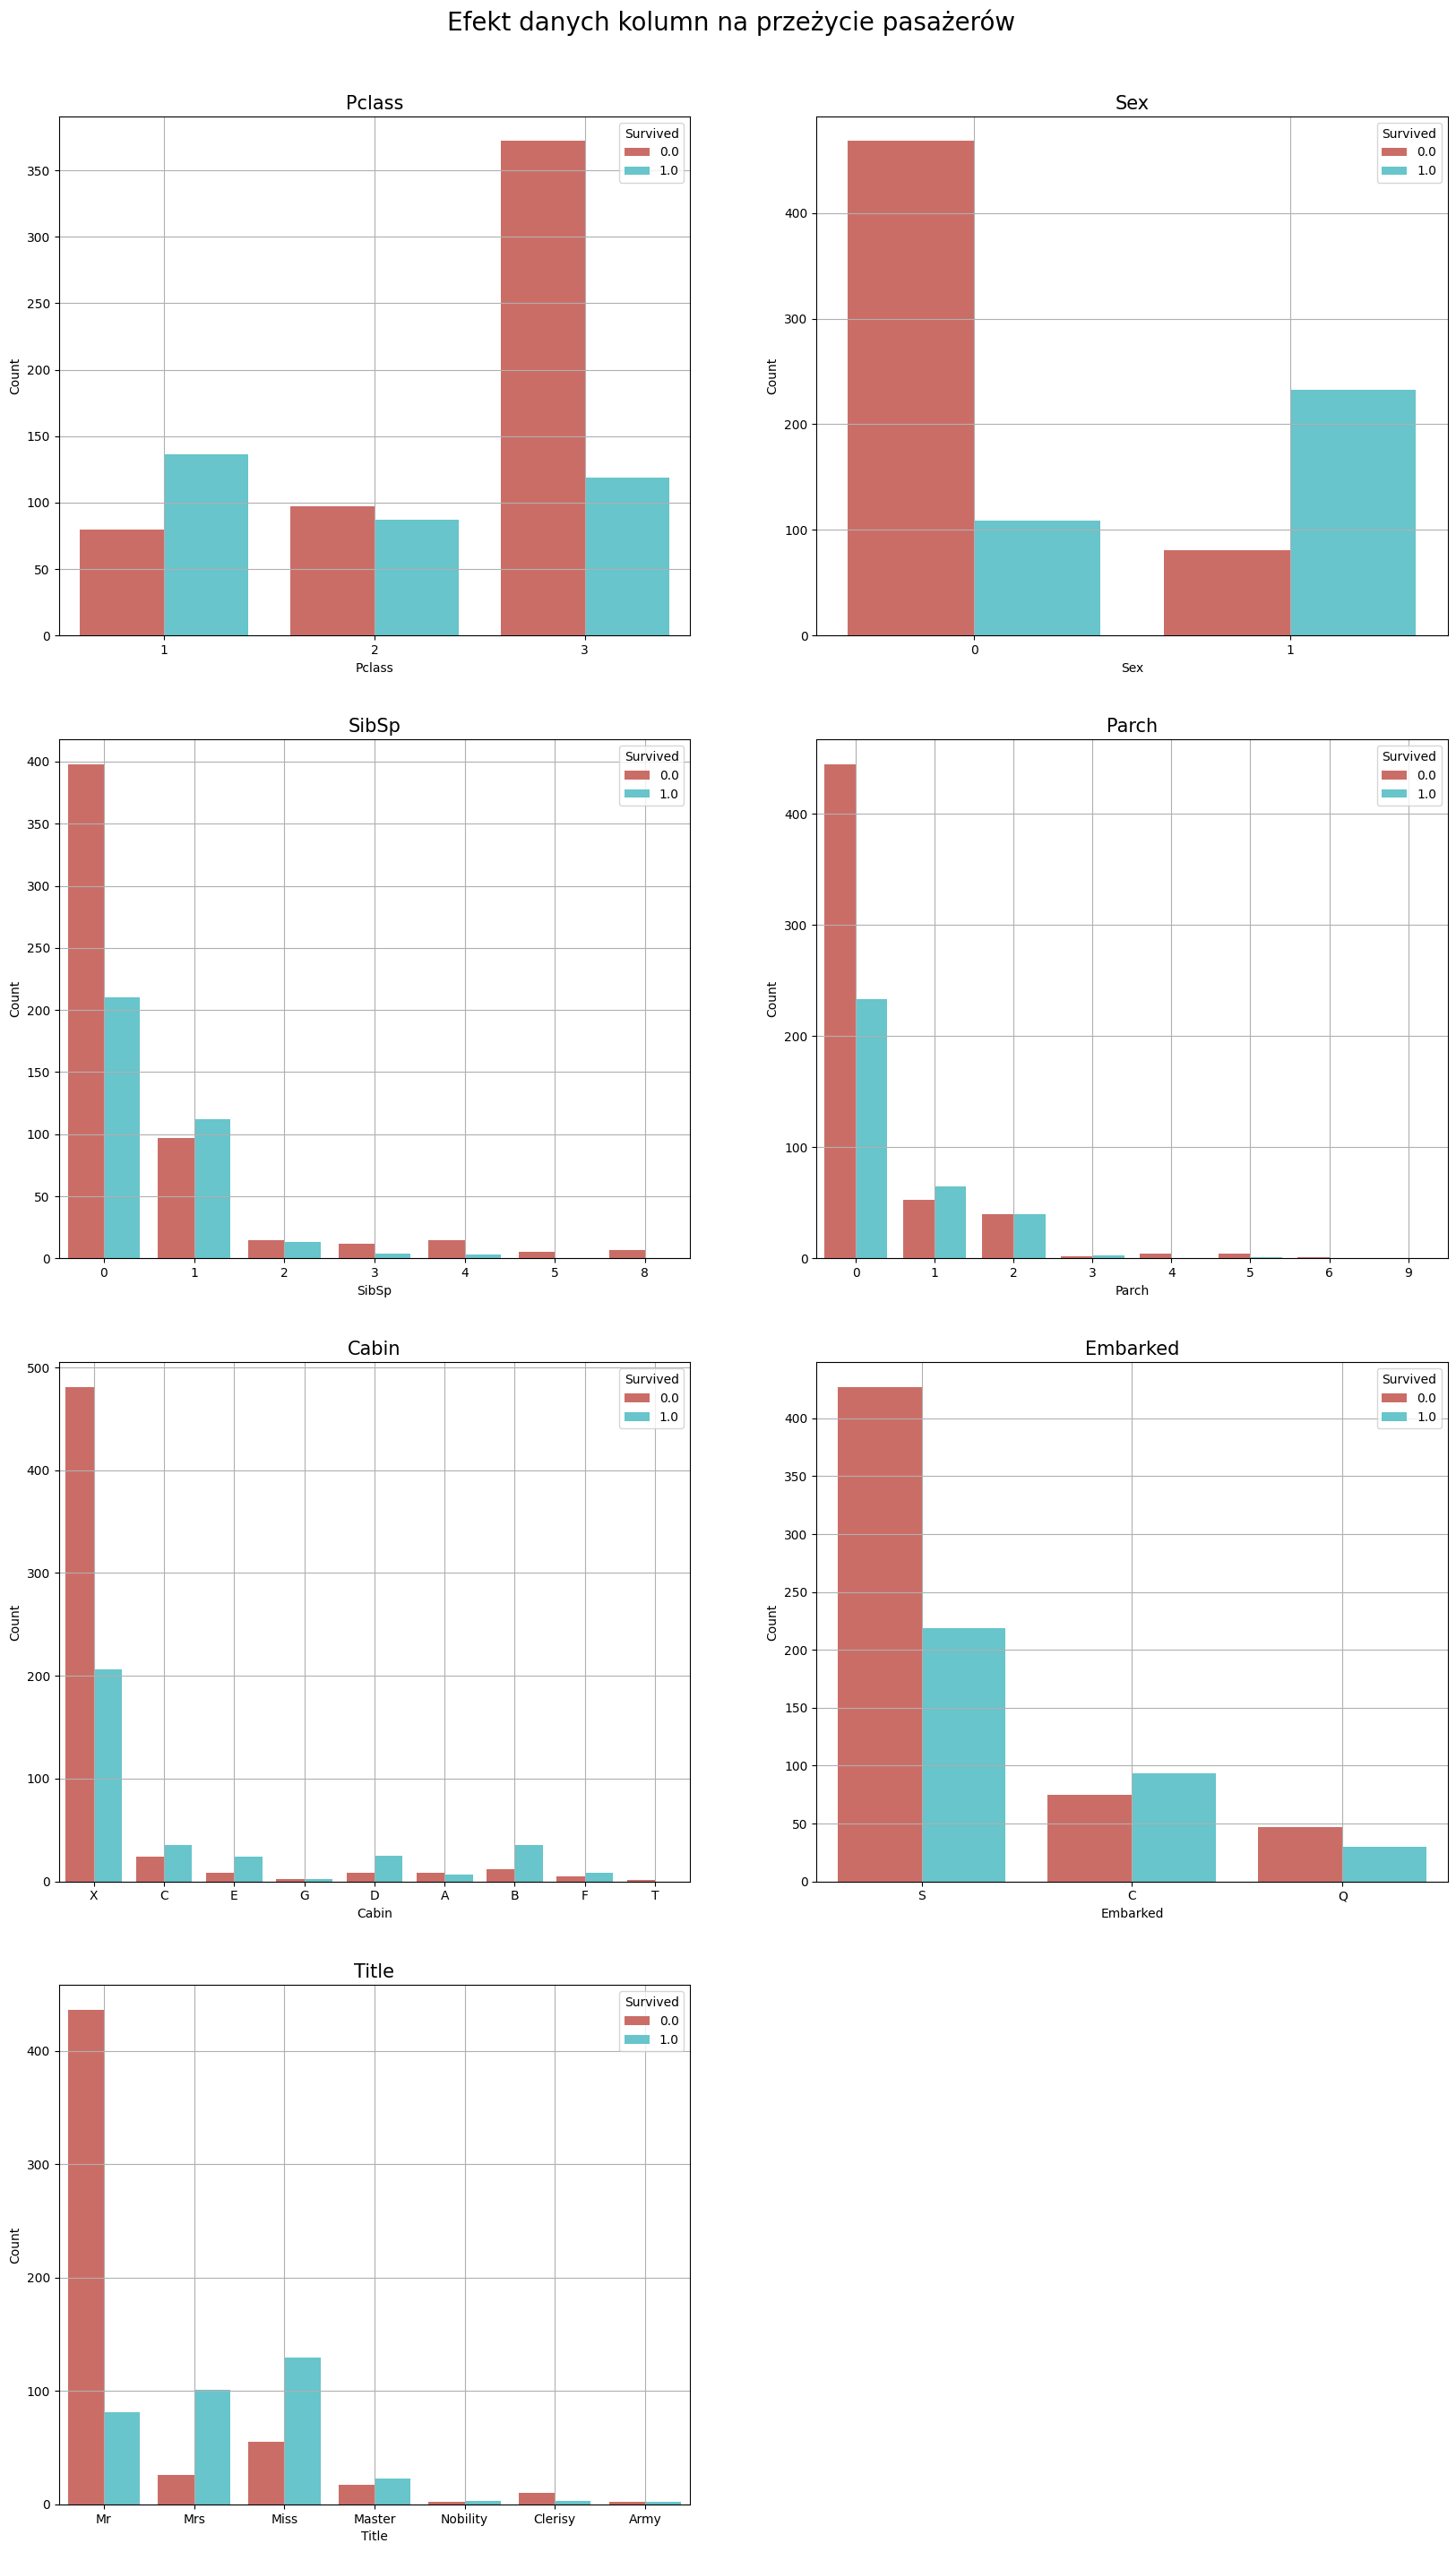

In [18]:
figure1 = plt.figure(figsize=(5, 2))
figure1.set_figwidth(20)
figure1.set_figheight(40)
figure1.suptitle("Efekt danych kolumn na przeżycie pasażerów", fontsize=20)
figure1.subplots_adjust(top=0.95)

index = 0

for col in df.columns:
    if col in ['PassengerId', 'Survived', 'Name', 'Ticket', 'Fare', 'Age']:
        continue
    index +=1
    fig = figure1.add_subplot(5,2, index)
    sns.countplot(x=col, hue='Survived', data=df, palette='hls')
    fig.set_title(col, fontsize=15)
    fig.grid()
    fig.set_xlabel(col, fontsize=10)
    fig.set_ylabel("Count", fontsize=10)

plt.show()

Ze względu na bardzo dużą dystrybucję danyc wykresy dla Fare i Age są nieczytelne dlatego wykresy dla tyc 2 kolumn znajdują się poniżej

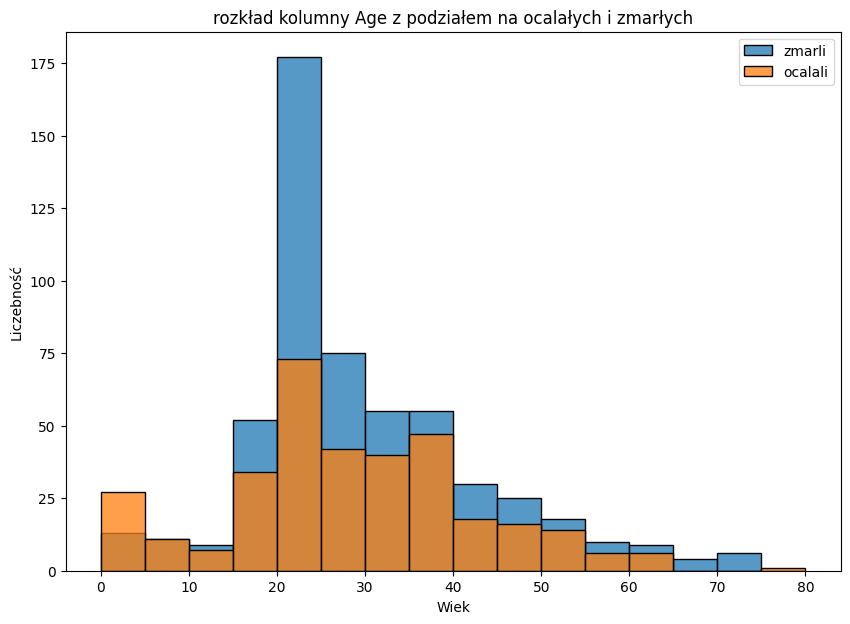

In [19]:
age_of_dead = df.query('Survived == 0')['Age']
age_of_alive = df.query('Survived == 1')['Age']
bins = np.arange(0, 81, 5)

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(ax=ax, bins=bins, data=age_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=age_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Age z podziałem na ocalałych i zmarłych')
plt.xlabel('Wiek')
plt.ylabel('Liczebność')
plt.show()

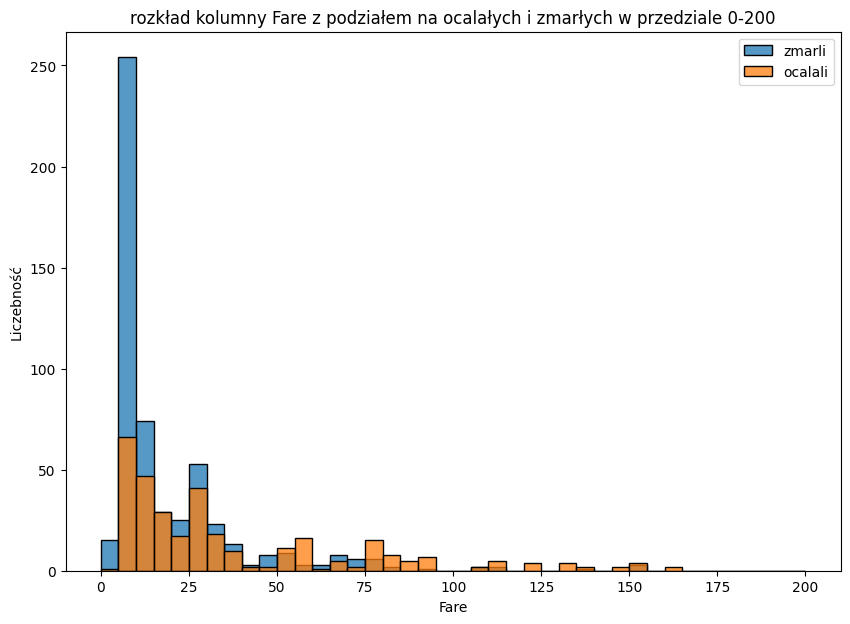

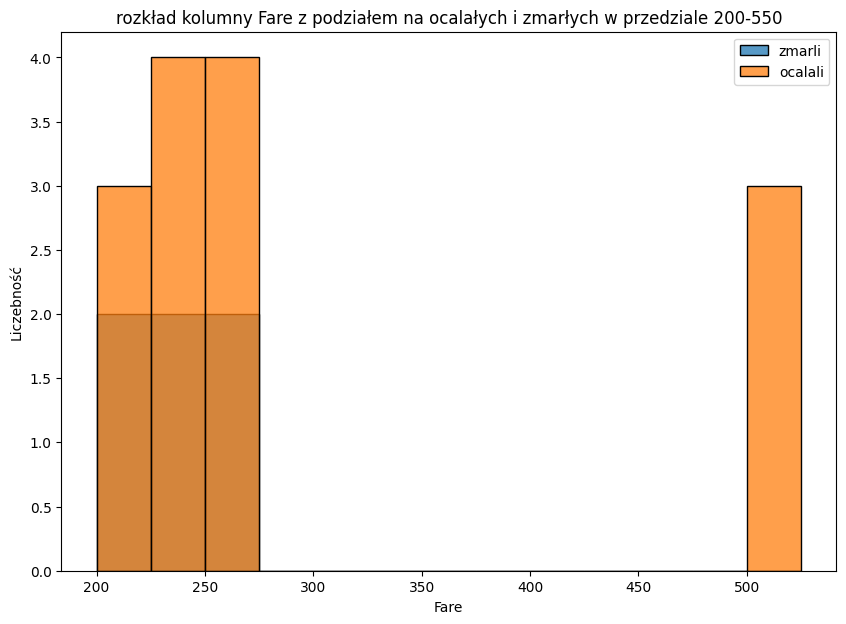

In [20]:
fare_of_dead = df.query('Survived == 0')['Fare']
fare_of_alive = df.query('Survived == 1')['Fare']
bins = np.arange(0, 201, 5)

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(ax=ax, bins=bins, data=fare_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=fare_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Fare z podziałem na ocalałych i zmarłych w przedziale 0-200')
plt.xlabel('Fare')
plt.ylabel('Liczebność')

plt.show()

bins = np.arange(200, 550, 25)

f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(ax=ax, bins=bins, data=fare_of_dead, label='zmarli')
sns.histplot(ax=ax, bins=bins, data=fare_of_alive, label='ocalali')
_ = plt.legend()

plt.title('rozkład kolumny Fare z podziałem na ocalałych i zmarłych w przedziale 200-550')
plt.xlabel('Fare')
plt.ylabel('Liczebność')

plt.show()

## Dalsze manipulacje

Ze względu na duży rozstzał danych spróbujmy pogrupować dane z Fare i Age

In [21]:
df['Age'].describe()

count    1309.000000
mean       29.207540
std        13.172381
min         0.170000
25%        22.000000
50%        26.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [22]:
df.loc[ df['Age'] <= 11, 'Age_group'] = 'below_11'
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age_group'] = '11-18'
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age_group'] = '18-22'
df.loc[(df['Age'] > 22) & (df['Age'] <= 26), 'Age_group'] = '22-26'
df.loc[(df['Age'] > 26) & (df['Age'] <= 33), 'Age_group'] = '26-33'
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age_group'] = '33-40'
df.loc[(df['Age'] > 40) & (df['Age'] <= 65), 'Age_group'] = '40-65'
df.loc[ df['Age'] > 65, 'Age_group'] = 'above_65'

In [23]:
df['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [24]:
df.loc[ df['Fare'] <= 7.91, 'Fare_group'] = 'below_7.91'
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_group'] = '7.91-14.454'
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_group']   = '14.454-31'
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 100), 'Fare_group']   = '31-100'
df.loc[(df['Fare'] > 100) & (df['Fare'] <= 300), 'Fare_group']   = '100-300'
df.loc[ df['Fare'] > 300, 'Fare_group'] = 'above 300'

Na bazie powyższych wizualizacji, możemy zauważyć, że wartości dla kolumn SibSp i Parch zachowują się bardzo podobnie, należy też zauważyć że oba odnoszą się do konotacji rodzinnych.

Kolumny Fare oraz Age ze względu na duży rozrzut danych można spróbować pogrupować te wartości.

In [25]:
df['Relatives'] = df['Parch'] + df['SibSp'] 

display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Fare_group,Relatives
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,X,S,Mr,18-22,below_7.91,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,33-40,31-100,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,22-26,7.91-14.454,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,33-40,31-100,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,X,S,Mr,33-40,7.91-14.454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,X,S,Mr,22-26,7.91-14.454,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,C,NaN,33-40,100-300,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,Mr,33-40,below_7.91,0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,X,S,Mr,22-26,7.91-14.454,0


Po mapwoaniu wartości na bardziej przystępne i ekstrakcji interesujących nas danych stworzymy kolumny z wartościami binarnymi z pomocą funkcji get_dummies które w odróżnieniu od wartości w zakresie 0-x oznaczających jakieś wartości nie powinny przekłamywać algorytmów

In [26]:
pclass = pd.get_dummies(df['Pclass'], prefix="Pclass")
embarked = pd.get_dummies(df['Embarked'], prefix="Embarked")
title = pd.get_dummies(df['Title'], prefix="Title")
cabin = pd.get_dummies(df['Cabin'], prefix="Cabin")
age_group = pd.get_dummies(df['Age_group'], prefix="AgeG")
fare_group = pd.get_dummies(df['Fare_group'], prefix="FareG")

df = pd.concat([df, pclass, embarked, title, cabin, age_group, fare_group], axis=1)

df = df.drop(columns=['Ticket', 'Name', 'Cabin', 'Pclass', 'Embarked', 'Title', 'Age_group', 'Fare_group'], axis=1)

display(df)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Relatives,Pclass_1,Pclass_2,...,AgeG_33-40,AgeG_40-65,AgeG_above_65,AgeG_below_11,FareG_100-300,FareG_14.454-31,FareG_31-100,FareG_7.91-14.454,FareG_above 300,FareG_below_7.91
0,1,0.0,0,22.0,1,0,7.2500,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,1,38.0,1,0,71.2833,1,True,False,...,True,False,False,False,False,False,True,False,False,False
2,3,1.0,1,26.0,0,0,7.9250,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,4,1.0,1,35.0,1,0,53.1000,1,True,False,...,True,False,False,False,False,False,True,False,False,False
4,5,0.0,0,35.0,0,0,8.0500,0,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,0,24.0,0,0,8.0500,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1305,1306,NaN,1,39.0,0,0,108.9000,0,True,False,...,True,False,False,False,True,False,False,False,False,False
1306,1307,NaN,0,38.5,0,0,7.2500,0,False,False,...,True,False,False,False,False,False,False,False,False,True
1307,1308,NaN,0,24.0,0,0,8.0500,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [27]:
test = df.iloc[891:]
df.to_csv('dataframe.csv', index=False)
df = df.iloc[:891]

## Test

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
random_forest = RandomForestClassifier(n_estimators=100)
scaler = MinMaxScaler()

In [29]:
features = list(df.columns)
features.remove('PassengerId')
features.remove('Survived')
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.2, random_state=42)

scaler.fit(X_train)
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

In [30]:
classifier.fit(train_data, y_train)
y_pred = classifier.predict(test_data)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy - KNN: ", accuracy)

random_forest.fit(train_data, y_train)
y_pred = random_forest.predict(test_data)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy - RForest: ", accuracy)

Accuracy - KNN:  0.8100558659217877
Accuracy - RForest:  0.8044692737430168


## Zapis do csv

In [31]:
df.to_csv('train_dataframe.csv', index=False)
test.to_csv('test_dataframe.csv', index=False)